In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('twitter.csv', sep=';')

# Display basic statistics
print("Dataset Info:")
print(df.info())
print("\n")

print("First 5 Rows of the Dataset:")
print(df.head())
print("\n")

print("Basic Statistics:")
print(df.describe(include='all'))
print("\n")

print("Sentiment Distribution:")
print(df['sentiment'].value_counts())
print("\n")

print("Missing Values in Each Column:")
print(df.isnull().sum())
print("\n")

print("Sample Tweet Text:")
print(df['tweet_text'].sample(5))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          50000 non-null  int64 
 1   tweet_text  50000 non-null  object
 2   tweet_date  50000 non-null  object
 3   sentiment   50000 non-null  int64 
 4   query_used  50000 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.9+ MB
None


First 5 Rows of the Dataset:
                    id                                         tweet_text  \
0  1050785521201541121  @Laranjito76 A pessoa certa para isso seria o ...   
1  1050785431955140608  @behin_d_curtain Para mim, é precisamente o co...   
2  1050785401248645120  Vou fazer um video hoje... estou pensando em f...   
3  1050785370982547461  aaaaaaaa amei tanto essas polaroids, nem sei e...   
4  1050785368902131713  Valoriza o coração do menininho que vc tem. El...   

                       tweet_date  sentiment quer

In [3]:
df.shape

(50000, 5)

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('twitter.csv', sep=';')

# Display the sentiment distribution to ensure we have enough data
print("Sentiment Distribution in Original Dataset:")
print(df['sentiment'].value_counts())
print("\n")

# Separate positive and negative tweets
positive_tweets = df[df['sentiment'] == 1]
negative_tweets = df[df['sentiment'] == 0]

# Check if there are enough tweets of each sentiment
if len(positive_tweets) < 5000 or len(negative_tweets) < 5000:
    raise ValueError("Not enough positive or negative tweets in the dataset to create a balanced sample.")

# Sample 5000 positive and 5000 negative tweets
positive_sample = positive_tweets.sample(n=5000, random_state=42)
negative_sample = negative_tweets.sample(n=5000, random_state=42)

# Concatenate the samples to create a new balanced DataFrame
balanced_sample = pd.concat([positive_sample, negative_sample])

# Shuffle the new DataFrame
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new sentiment distribution
print("Sentiment Distribution in Balanced Sample:")
print(balanced_sample['sentiment'].value_counts())
print("\n")

# Save the new DataFrame to a CSV file
balanced_sample.to_csv('balanced_twitter_sample.csv', index=False, sep=';')

print("Balanced sample created and saved to 'balanced_twitter_sample.csv'")


Sentiment Distribution in Original Dataset:
sentiment
1    25000
0    25000
Name: count, dtype: int64


Sentiment Distribution in Balanced Sample:
sentiment
0    5000
1    5000
Name: count, dtype: int64


Balanced sample created and saved to 'balanced_twitter_sample.csv'


In [5]:
import pandas as pd

# Load the balanced dataset
balanced_sample = pd.read_csv('balanced_twitter_sample.csv', sep=';')

# Display basic information about the dataset
print("Dataset Info:")
print(balanced_sample.info())
print("\n")

# Display the first 5 rows of the dataset
print("First 5 Rows of the Dataset:")
print(balanced_sample.head())
print("\n")

# Display basic statistics for the dataset
print("Basic Statistics:")
print(balanced_sample.describe(include='all'))
print("\n")

# Display the distribution of the sentiment column
print("Sentiment Distribution:")
print(balanced_sample['sentiment'].value_counts())
print("\n")

# Check for missing values in each column
print("Missing Values in Each Column:")
print(balanced_sample.isnull().sum())
print("\n")

# Display a sample of 5 random tweet texts
print("Sample Tweet Texts:")
print(balanced_sample['tweet_text'].sample(5))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10000 non-null  int64 
 1   tweet_text  10000 non-null  object
 2   tweet_date  10000 non-null  object
 3   sentiment   10000 non-null  int64 
 4   query_used  10000 non-null  object
dtypes: int64(2), object(3)
memory usage: 390.8+ KB
None


First 5 Rows of the Dataset:
                    id                                         tweet_text  \
0  1049139104452157442           @laricacosta É o jeito, tudo menos PT :(   
1  1045508269136125953                     @chilena_03 @oiejuao eu xei :)   
2  1050743753621860354  Bom dia :) https://t.co/sz3jfwRBA8 https://t.c...   
3  1046766046592606208  Toma uma vaquinha jogando bola p começar essa ...   
4  1049169281886429184  @RexhaBrasil Boa tentativa, meu voto ainda é 1...   

                       tweet_date  sentiment que

Sentiment Distribution:
sentiment
0    5000
1    5000
Name: count, dtype: int64




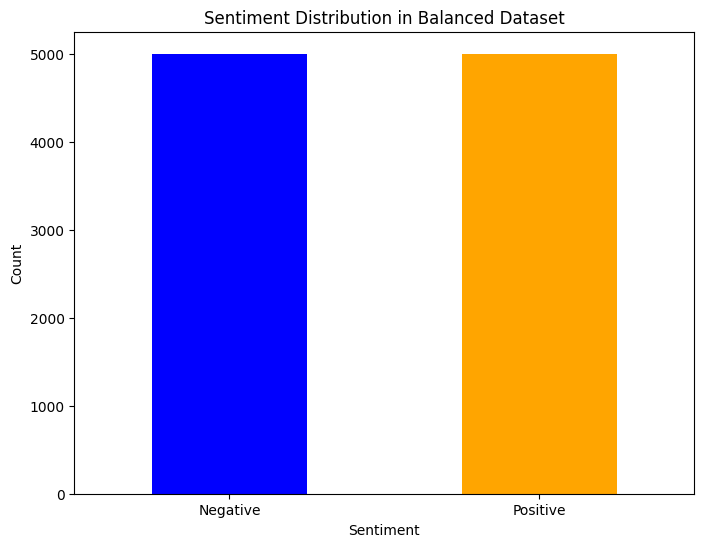

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the balanced dataset
balanced_sample = pd.read_csv('balanced_twitter_sample.csv', sep=';')

# Check the sentiment distribution
sentiment_counts = balanced_sample['sentiment'].value_counts()

# Print the sentiment distribution
print("Sentiment Distribution:")
print(sentiment_counts)
print("\n")

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Sentiment Distribution in Balanced Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()


<ipython-input-7-7396292ca6b6>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  balanced_sample['tweet_date'] = pd.to_datetime(balanced_sample['tweet_date'])


Number of tweets by day of the week:
day_of_week
Friday       1015
Monday       4908
Saturday      395
Sunday         25
Tuesday      2241
Wednesday    1416
Name: count, dtype: int64




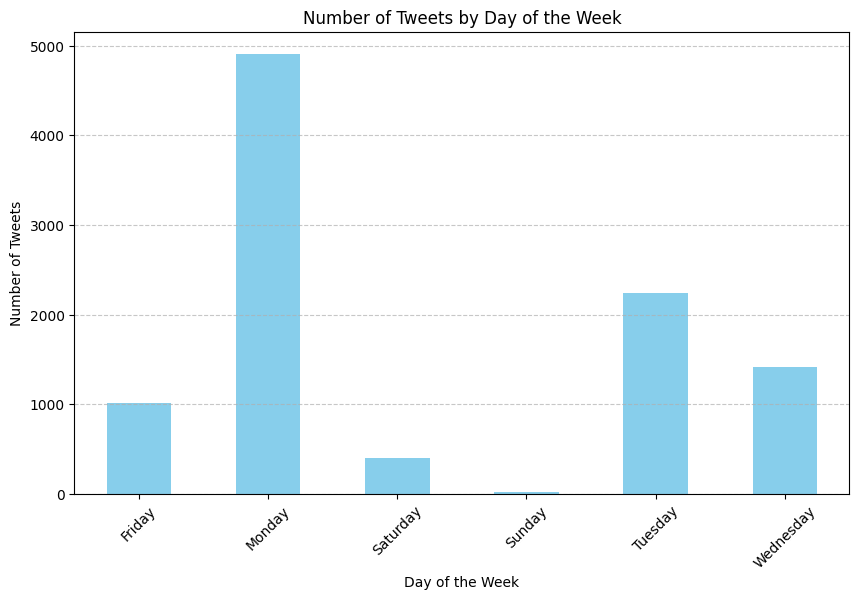

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the balanced dataset
balanced_sample = pd.read_csv('balanced_twitter_sample.csv', sep=';')

# Convert the tweet_date column to datetime format
balanced_sample['tweet_date'] = pd.to_datetime(balanced_sample['tweet_date'])

# Extract the day of the week from the tweet_date
balanced_sample['day_of_week'] = balanced_sample['tweet_date'].dt.day_name()

# Group by day of the week and count the number of tweets
tweets_by_day = balanced_sample['day_of_week'].value_counts().sort_index()

# Print the tweets by day of the week
print("Number of tweets by day of the week:")
print(tweets_by_day)
print("\n")

# Plot the number of tweets by day of the week
plt.figure(figsize=(10, 6))
tweets_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of Tweets by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


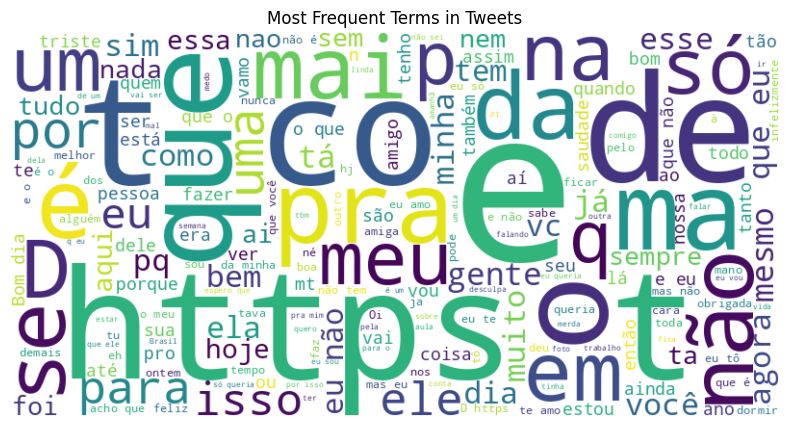

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the balanced dataset
balanced_sample = pd.read_csv('balanced_twitter_sample.csv', sep=';')

# Combine all tweets into a single string
all_tweets = ' '.join(balanced_sample['tweet_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Terms in Tweets')
plt.show()


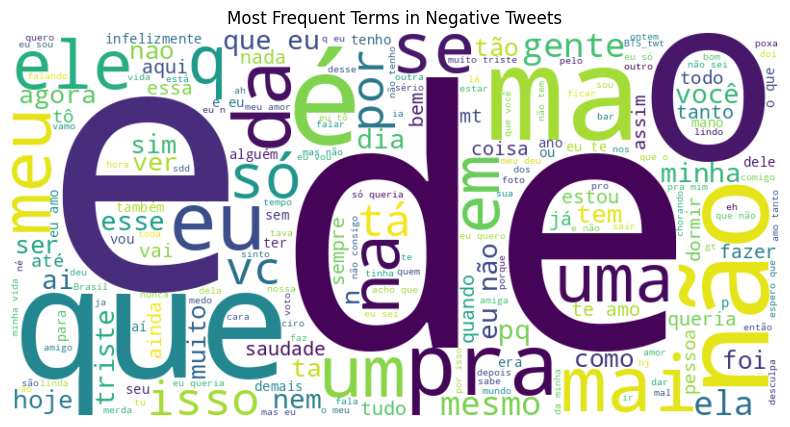

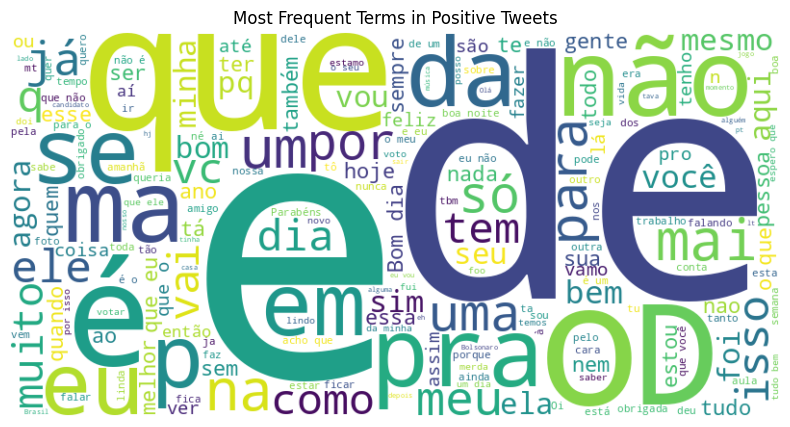

In [11]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the balanced dataset
balanced_sample = pd.read_csv('balanced_twitter_sample.csv', sep=';')

# Define stop words
stopwords = set(STOPWORDS)
stopwords.update(["https", "co", "RT", "t", "c", "amp"])

# Generate word clouds for positive and negative tweets
for sentiment in [0, 1]:
    # Filter tweets based on sentiment label
    sentiment_tweets = balanced_sample[balanced_sample['sentiment'] == sentiment]

    # Combine tweet texts into a single string
    all_tweets = ' '.join(sentiment_tweets['tweet_text'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', stopwords=stopwords).generate(all_tweets)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Terms in {"Positive" if sentiment == 1 else "Negative"} Tweets')
    plt.show()
